In [1]:
import math
import time
import matplotlib.pyplot as plt
import random
import mpmath as mp

# Definicje funkcji testowych

In [2]:
def f1(x):
    return mp.cos(x) * mp.cosh(x) - 1

def f2(x, epsilon=mp.mpf('1e-10')):
    return 1/(x + epsilon) - mp.tan(x)

def f3(x):
    return mp.power(2, -x) + mp.exp(x) + 2 * mp.cos(x) - 6

# Funkcja do rysowania wykresów funkcji z możliwością dodania miejsca zerowego

In [3]:
def plot_function(f, a, b, n, root=None):
    x_values = [mp.mpf(str(a + i * (b-a)/n)) for i in range(n+1)]
    y_values = [f(x) for x in x_values]
    
    plt.plot([float(x) for x in x_values], [float(y) for y in y_values], label='f(x)')

    if root is not None:
        plt.plot(float(root), float(f(mp.mpf(root))), 'ro', label='Root')
    
    plt.title('Wykres funkcji f(x)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

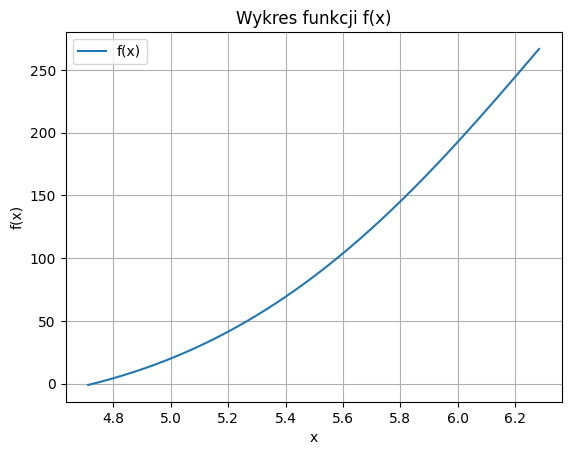

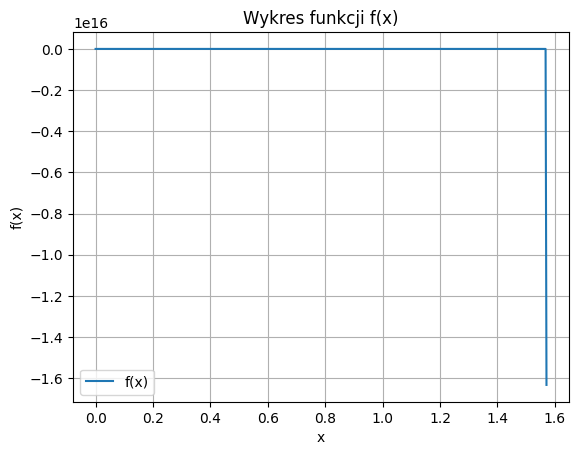

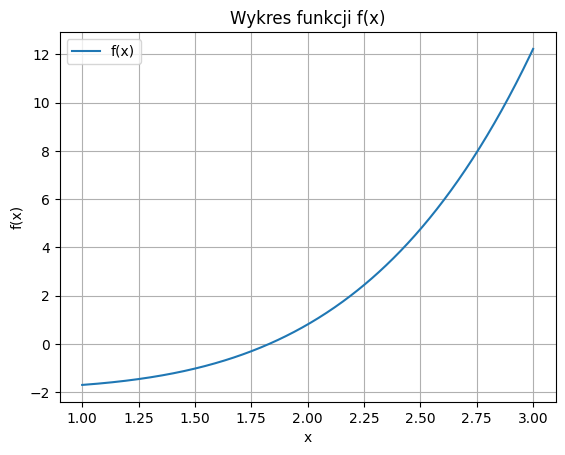

In [4]:
n = 500
plot_function(f1, 1.5*math.pi, 2*math.pi, n)
plot_function(f2, 0, 0.5*math.pi, n)
plot_function(f3, 1, 3, n)

# Wyliczone pochodne do Metody Newtona

In [5]:
def df1(x):
    return mp.cos(x) * mp.sinh(x) - mp.sin(x) * mp.cosh(x)

def df2(x):
    return -1/mp.power(x, 2) - 1/mp.power(mp.cos(x), 2)

def df3(x):
    return mp.exp(x) - mp.log(2) * mp.power(2, -x) - 2 * mp.sin(x)

# Metoda bisekcji z możliwością zdefiniowania dokładności przybliżenia, precyzji obliczeń oraz timeoutu

In [6]:
def bisection_method(f, a, b, absolute_error, timeout_seconds, precision):
    mp.dps = precision
    start_time = time.time()
    a, b = mp.mpf(a), mp.mpf(b)
    absolute_error = mp.mpf(absolute_error)
    
    fa, fb = f(a), f(b)

    if fa * fb > 0:
        raise ValueError("Funkcja nie zmienia znaku na podanym przedziale.")

    n = 0
    while b - a > absolute_error:
        if time.time() - start_time > timeout_seconds:
            print("Timeout reached")
            return None, n

        n += 1
        c = (a + b) / 2
        fc = f(c)
        if fc == 0 or b - a < absolute_error:
            return c, n
        elif fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc

    return (a + b) / 2, n

In [7]:
def test_bisection_method(f, a, b, epsilon, precision):
    print("Precyzja obliczeń: " + str(precision) + " miejsc po przecinku")
    root, iterations = bisection_method(f, a, b, epsilon, 30, precision)
    if root is None:
        print("Szukanie pierwiastka przekroczyło 30 sekund, do tej pory program wykonał " + str(iterations) + " iteracji")
    
    else:
        print("Potrzeba było " + str(iterations) + " iteracji żeby znaleźć pierwiastek przy dokładności " + str(epsilon))
        print("Wartość pierwiastka: x=", root)
        plot_function(f, a, b, 500, root)

Precyzja obliczeń: 64 miejsc po przecinku
Potrzeba było 24 iteracji żeby znaleźć pierwiastek przy dokładności 1e-07
Wartość pierwiastka: x= 4.73004076058933


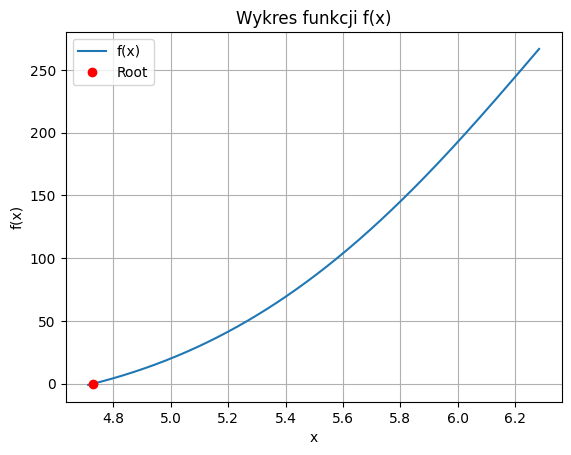

Precyzja obliczeń: 64 miejsc po przecinku
Potrzeba było 51 iteracji żeby znaleźć pierwiastek przy dokładności 1e-15
Wartość pierwiastka: x= 0.860333588982886


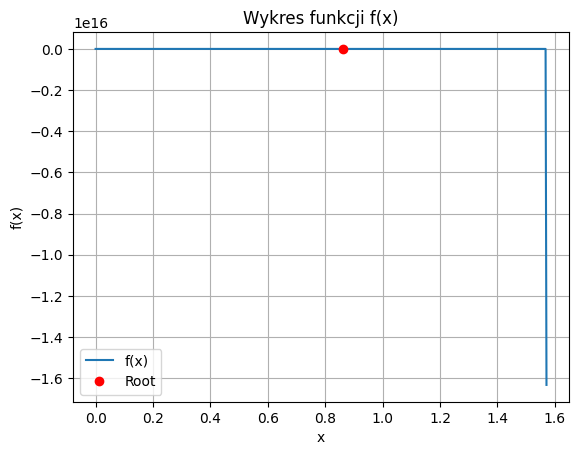

Precyzja obliczeń: 64 miejsc po przecinku
Potrzeba było 51 iteracji żeby znaleźć pierwiastek przy dokładności 1e-15
Wartość pierwiastka: x= 1.82938360193385


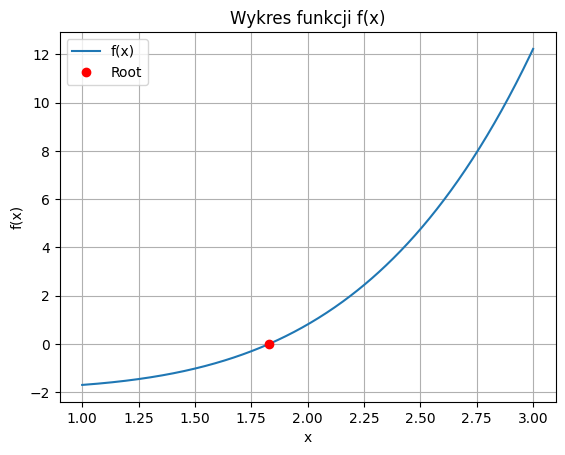

Precyzja obliczeń: 64 miejsc po przecinku
Potrzeba było 51 iteracji żeby znaleźć pierwiastek przy dokładności 1e-15
Wartość pierwiastka: x= 4.7300407448627


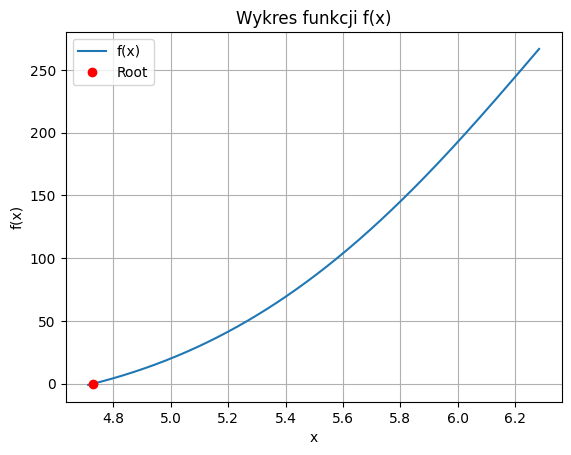

Precyzja obliczeń: 64 miejsc po przecinku
Timeout reached
Szukanie pierwiastka przekroczyło 30 sekund, do tej pory program wykonał 2578475 iteracji


In [8]:
test_bisection_method(f1, 1.5*math.pi, 2*math.pi, 10**(-7), 64)
test_bisection_method(f2, 0, 0.5*math.pi, 10**(-15), 64)
test_bisection_method(f3, 1, 3, 10**(-15), 64)

test_bisection_method(f1, 1.5*math.pi, 2*math.pi, 10**(-15), 64)
test_bisection_method(f1, 1.5*math.pi, 2*math.pi, 10**(-33), 64)

Metoda bisekcji odznacza się dużą złożonością obliczeniową, nie udało się uzyskać bezwzględnej dokładności rzędu $10^{-33}$ w rozsądnym czasie.

Funkcja $f_{1}(x)$ ma miejsca zerowe bardzo zbliżone do funkcji $cos(x)$ ponieważ $cosh(x)$ jest funkcją bardzo szybko rosnącą i jego odwrotność w miejscu zerowym jest bardzo bliska 0. Tak więc możemy wziąć początkowe końce przedziałów a oraz b a następnie przesuwać je o $\pi$ za każdym razem gdy szukamy nowego miejsca zerowego.

In [9]:
def newton_method(f, df, x0, epsilon, max_iter, precision):
    mp.dps = precision
    x0 = mp.mpf(x0)
    epsilon = mp.mpf(epsilon)
    
    for i in range(max_iter):
        fx = f(x0)
        dfx = df(x0)
        if mp.almosteq(dfx, mp.mpf(0)):
            raise ZeroDivisionError("Pochodna równa zero, metoda Newtona nie może kontynuować.")
        x1 = x0 - fx / dfx
        if mp.fabs(x1 - x0) < epsilon:
            return x1, i + 1
        x0 = x1
    return x1, max_iter

In [10]:
def test_newton_method(f, df, x0, epsilon, max_iter, a, b, precision):
    print("Precyzja obliczeń: " + str(precision) + " miejsc po przecinku")
    root, iterations = newton_method(f, df, x0, epsilon, max_iter, precision)
    
    if iterations == max_iter:
        print("Osiągnięto maksymalnę liczbę iteracji")
    
    else:
        print("Potrzeba było " + str(iterations) + " iteracji żeby znaleźć pierwiastek przy precyzji " + str(epsilon))
        
    print("Wartość pierwiastka: x=", root)
    plot_function(f, a, b, 500, root)

Precyzja obliczeń: 64 miejsc po przecinku
Potrzeba było 6 iteracji żeby znaleźć pierwiastek przy precyzji 1e-33
Wartość pierwiastka: x= 4.7300407448627


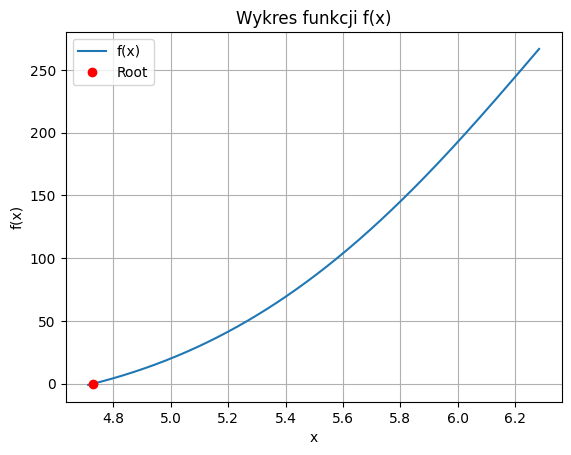

Precyzja obliczeń: 64 miejsc po przecinku
Potrzeba było 7 iteracji żeby znaleźć pierwiastek przy precyzji 1e-33
Wartość pierwiastka: x= 0.860333588982886


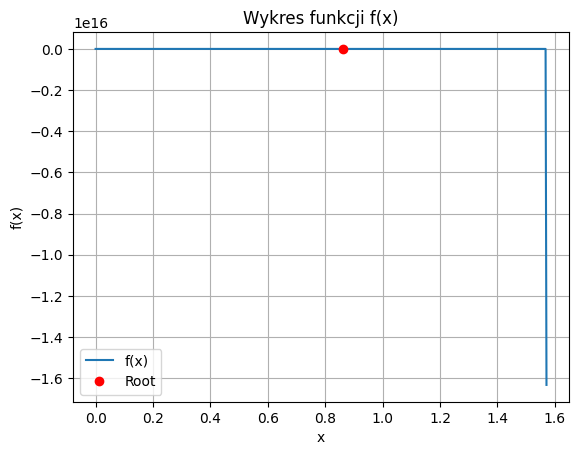

Precyzja obliczeń: 64 miejsc po przecinku
Potrzeba było 7 iteracji żeby znaleźć pierwiastek przy precyzji 1e-33
Wartość pierwiastka: x= 1.82938360193385


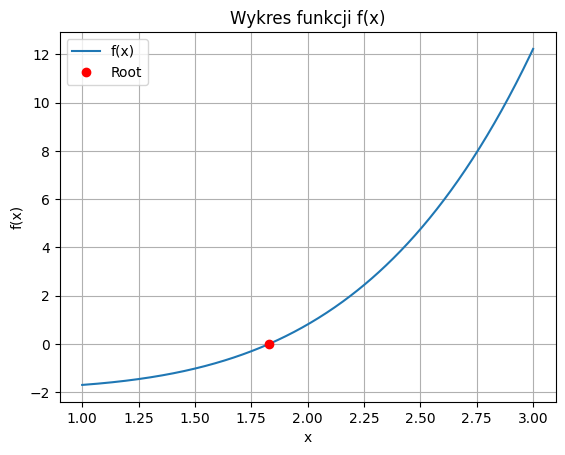

In [11]:
test_newton_method(f1, df1, random.uniform(1.5*math.pi, 2*math.pi), 10**(-33), 100000000, 1.5*math.pi, 2*math.pi, 64)
test_newton_method(f2, df2, random.uniform(0, 0.5*math.pi), 10**(-33), 100000000, 0, 0.5*math.pi, 64)
test_newton_method(f3, df3, random.uniform(1, 3), 10**(-33), 100000000, 1, 3, 64)

In [12]:
def secant_method(f, x0, x1, epsilon, max_iter, precision):
    mp.dps = precision
    x0, x1 = mp.mpf(x0), mp.mpf(x1)
    epsilon = mp.mpf(epsilon)
    
    for n in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        denominator = fx1 - fx0
        if mp.almosteq(denominator, mp.mpf(0), rel_eps=epsilon):
            print("Błąd: Wartość mianownika w metodzie siecznych jest zbyt bliska zeru.")
            return x1, n
        x2 = x1 - fx1 * (x1 - x0) / denominator
        if mp.fabs(x2 - x1) < epsilon:
            return x2, n + 1
        x0, x1 = x1, x2
    return x1, max_iter

In [13]:
def test_secant_method(f, x0, x1, epsilon, max_iter, a, b, precision):
    print("Precyzja obliczeń: " + str(precision) + " miejsc po przecinku")
    root, iterations = secant_method(f, x0, x1, epsilon, max_iter, precision)
    
    if iterations == max_iter:
        print("Osiągnięto maksymalną liczbę iteracji")
    
    else:
        print("Potrzeba było " + str(iterations) + " iteracji żeby znaleźć pierwiastek przy precyzji " + str(epsilon))
    
    print("Wartość pierwiastka: x=", root)
    plot_function(f, a, b, 500, root)

Precyzja obliczeń: 64 miejsc po przecinku
Potrzeba było 7 iteracji żeby znaleźć pierwiastek przy precyzji 1e-33
Wartość pierwiastka: x= 4.7300407448627


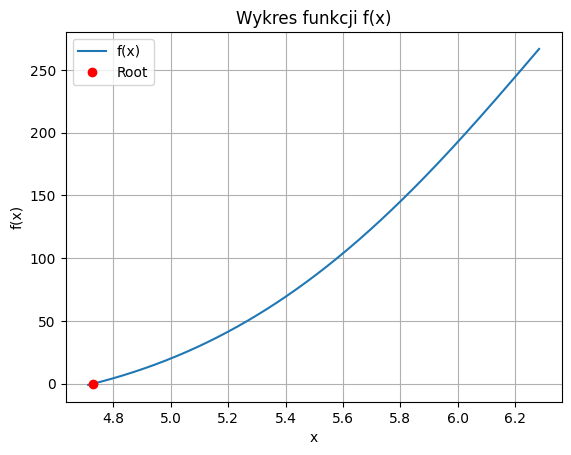

Precyzja obliczeń: 64 miejsc po przecinku
Potrzeba było 38 iteracji żeby znaleźć pierwiastek przy precyzji 1e-33
Wartość pierwiastka: x= 0.860333588982886


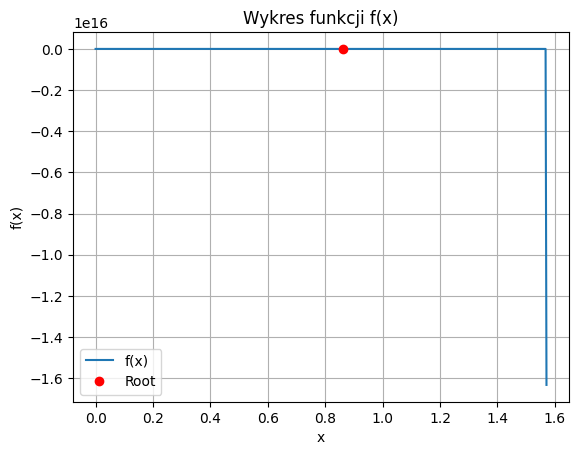

Precyzja obliczeń: 64 miejsc po przecinku
Potrzeba było 12 iteracji żeby znaleźć pierwiastek przy precyzji 1e-33
Wartość pierwiastka: x= 1.82938360193385


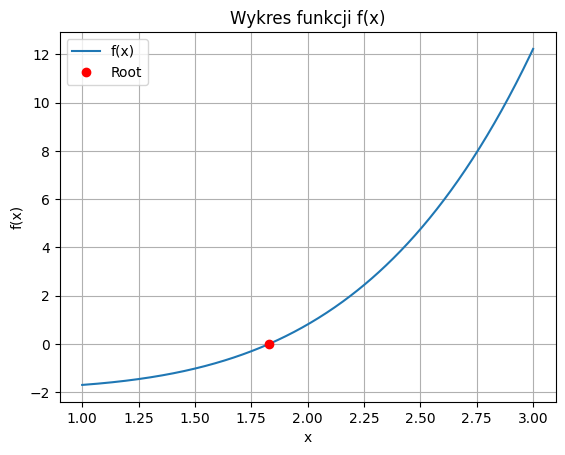

In [14]:
test_secant_method(f1, 1.5*math.pi, 2*math.pi, 10**(-33), 100000000, 1.5*math.pi, 2*math.pi, 64)
test_secant_method(f2, 0, 0.5*math.pi, 10**(-33), 100000000, 0, 0.5*math.pi, 64)
test_secant_method(f3, 1, 3, 10**(-33), 100000000, 1, 3, 64)

## Porównanie wszystkich metod

W ramach zadania z metod obliczeniowych przetestowałem trzy różne metody znajdowania miejsc zerowych funkcji: **metodę bisekcji**, **metodę Newtona** oraz **metodę siecznych**. Poniżej przedstawiam wnioski z przeprowadzonych eksperymentów.

### Metoda bisekcji
- **Szybkość i liczba iteracji**: Metoda bisekcji okazała się być najwolniejszą z testowanych metod, wymagając największej liczby iteracji do osiągnięcia satysfakcjonującej dokładności.
- **Zalety**: Jest to metoda bardzo stabilna i gwarantowana do znalezienia pierwiastka, o ile tylko na początku wybrany przedział zawiera miejsce zerowe i funkcja zmienia znak na jego końcach.
- **Wady**: Główną wadą jest jej stosunkowo wolna zbieżność w porównaniu do pozostałych metod.

### Metoda Newtona
- **Szybkość i liczba iteracji**: Metoda Newtona okazała się najbardziej efektywną z testowanych metod, wymagając najmniejszej liczby iteracji do osiągnięcia pożądanej dokładności.
- **Zalety**: Szybka zbieżność przy dobrym początkowym przybliżeniu. Nie wymaga znajomości przedziału zawierającego pierwiastek na starcie.
- **Wady**: Wymaga znajomości pochodnej funkcji. Może nie zbiegać się w przypadku niefortunnego wyboru wartości początkowej lub gdy pochodna funkcji w punkcie zerowym jest równa zero.

### Metoda siecznych
- **Szybkość i liczba iteracji**: Metoda siecznych zajmuje pozycję pośrednią między metodą bisekcji a metodą Newtona pod względem liczby potrzebnych iteracji.
- **Zalety**: Nie wymaga znajomości pochodnej funkcji, co może być korzystne w niektórych zastosowaniach.
- **Wady**: Należy uważać przy obliczaniu wartości wyrażenia `f(x1) - f(x0)`, ponieważ może się ono w niektórych przypadkach bardzo zbliżyć do 0. Trzeba rozpatrzeć ten przypadek, aby uniknąć dzielenia przez zero.

### Wnioski
- Każda z metod ma swoje specyficzne zalety i idealnie nadaje się do różnych scenariuszy użycia. Wybór metody zależy od wielu czynników, takich jak dostępność pochodnej funkcji, wymagana dokładność i zakres poszukiwań pierwiastka.
- Istotne jest odpowiednie przygotowanie i analiza funkcji przed zastosowaniem metody numerycznej, aby zoptymalizować proces znajdowania miejsc zerowych.
